In [57]:
import pandas as pd
Q_top_df = pd.DataFrame(columns=["Q_top", "I_HP", "DeltaT_HP"], index=pd.MultiIndex(levels=[[], []], codes=[[], []], names=["P_rad", "T_amb"]))
display(Q_top_df)

,,Q_top,I_HP,DeltaT_HP
P_rad,T_amb,,,


In [36]:
## Arrows
# Steps and thresholds to sparse the arrows
arrow_step = 80
# threshold_dx = 1.0
# threshold_dy = 0.003

# def moving_average(data, window_size):
#     return np.convolve(data, np.ones(window_size) / window_size, mode='valid')
# # Remove noise
# window_size = 20
# smoothed_x_sim = moving_average(x_sim, window_size)
# smoothed_y_sim = moving_average(y_sim, window_size)

# dx = np.diff(smoothed_x_sim)
# dy = np.diff(smoothed_y_sim)

# # Mask to filter and get only transients
# arrow_mask = (np.abs(dx) > threshold_dx) | (np.abs(dy) > threshold_dy)
# arrow_mask = np.concatenate((np.zeros(window_size), arrow_mask))
# arrow_mask = np.cumsum(arrow_mask[::-1]) > 0
# arrow_mask = arrow_mask[::-1]

# arrow_x_vec = x_sim[arrow_mask]
# arrow_y_vec = y_sim[arrow_mask]

# arrow_dx_vec = dx[arrow_mask[window_size:]]
# arrow_dy_vec = dy[arrow_mask[window_size:]]

# arrow_x_vec = arrow_x_vec[::arrow_step]
# arrow_y_vec = arrow_y_vec[::arrow_step]
# arrow_dx_vec = arrow_dx_vec[::arrow_step]
# arrow_dy_vec = arrow_dy_vec[::arrow_step]

In [37]:
# import numpy as np
# import phaseportrait

# def pendulum(x, y):
#     x_dot = np.cos(y)
#     y_dot = np.sin(x)
#     return x_dot, y_dot

# SimplePendulum = phaseportrait.PhasePortrait2D(pendulum, [-9, 9], Title='Simple pendulum', xlabel=r"$\Theta$", ylabel=r"$\dot{\Theta}$")
# SimplePendulum.plot()


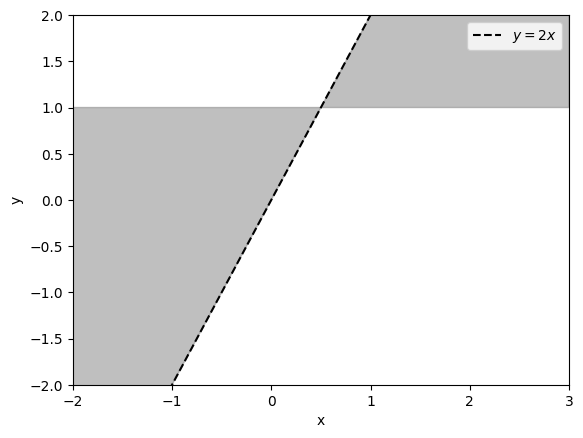

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Sample figure
fig, ax = plt.subplots()

# Line equation y = 2x
x = np.linspace(-2, 3, 500)
y = 2 * x
ax.plot(x, y, color='black', linestyle='--', label=r'$y = 2x$')

# Define x limits for left and right halves
x_left, x_right = -2, 3

# Fill the region below y = 2x (left of the line)
ax.fill_between(x, y, 1, color='gray', alpha=0.5)

# Adjust limits and labels
ax.set_xlim(x_left, x_right)
ax.set_ylim(-2, 2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()


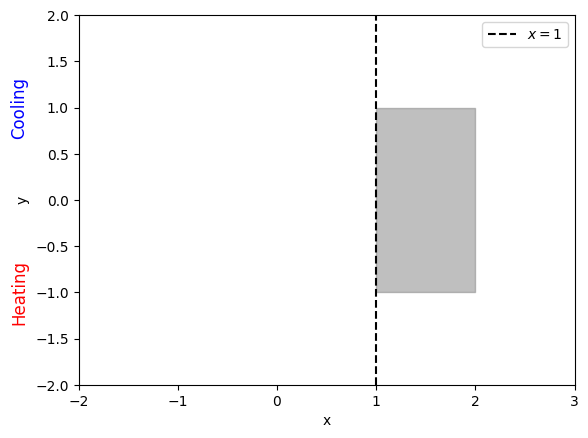

In [40]:
import matplotlib.pyplot as plt

# Sample figure
fig, ax = plt.subplots()

# Vertical line at x = 1
x = 1
ax.axvline(x=x, color='black', linestyle='--', label=r'$x = 1$')

# Define y limits for top and bottom halves
y_bottom, y_top = -2, 2

# Fill the left region (gray) for x < 1
ax.fill_betweenx([-1, 1], 2, x, color='gray', alpha=0.5)

ax.text(-2.6, 1, "Cooling", fontsize=12, ha='center', va='center', rotation=90, color='blue')
ax.text(-2.6, -1, "Heating", fontsize=12, ha='center', va='center', rotation=90, color='red')


# Adjust limits and labels
ax.set_xlim(-2, 3)
ax.set_ylim(y_bottom, y_top)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()

In [41]:
import numpy as np
num_traj_1 = 21
P_rad_vec = np.linspace(0, 1.0, num_traj_1)
print(P_rad_vec)

num_traj_2 = 11
T_amb_vec = np.linspace(-11.0, 49.0, num=num_traj_2)
print(T_amb_vec)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[-11.  -5.   1.   7.  13.  19.  25.  31.  37.  43.  49.]


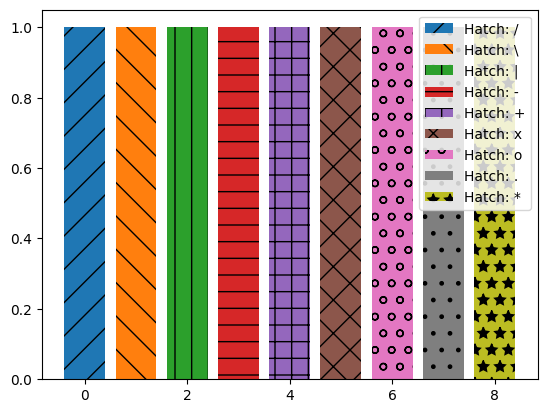

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Example bars with different hatches
patterns = ['/', '\\', '|', '-', '+', 'x', 'o', '.', '*']
for i, pattern in enumerate(patterns):
    ax.bar(i, 1, hatch=pattern, label=f"Hatch: {pattern}")

ax.legend()
plt.show()


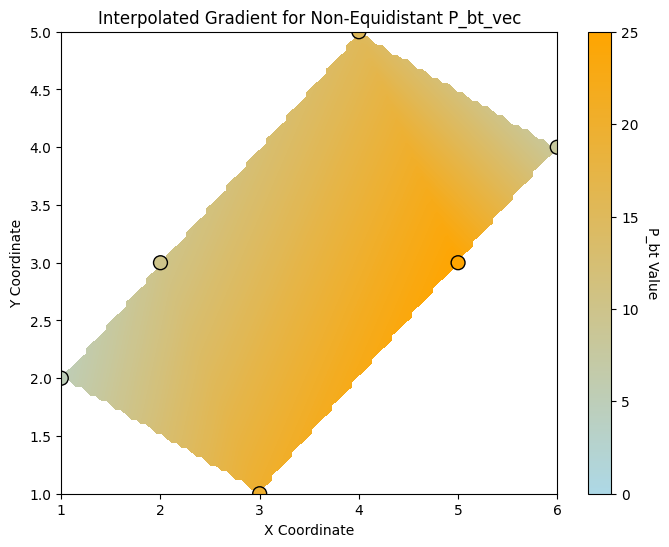

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from scipy.interpolate import griddata

# Define the colormap and normalization
color_gradient_P_bt = ["lightblue", "orange"]
cmap_tracked_P_bt = LinearSegmentedColormap.from_list("P_bt_scale", color_gradient_P_bt)
norm_tracked_P_bt = Normalize(vmin=0, vmax=25)

# Define the matrix of P_bt_vec (x, y, P_bt)
P_bt_vec = np.array([
    [1, 2, 5],
    [2, 3, 10],
    [3, 1, 20],
    [4, 5, 15],
    [5, 3, 25],
    [6, 4, 8]
])

x, y, P_bt = P_bt_vec[:, 0], P_bt_vec[:, 1], P_bt_vec[:, 2]

# Create a meshgrid for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 100),
    np.linspace(y.min(), y.max(), 100)
)

# Interpolate the P_bt values onto the grid
grid_P_bt = griddata((x, y), P_bt, (grid_x, grid_y), method='linear')

# Plot the interpolated data
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, grid_P_bt, levels=100, cmap=cmap_tracked_P_bt, norm=norm_tracked_P_bt)

# Overlay the original P_bt_vec
plt.scatter(x, y, c=P_bt, cmap=cmap_tracked_P_bt, norm=norm_tracked_P_bt, edgecolor='k', s=100)

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('P_bt Value', rotation=270, labelpad=15)

# Set labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Interpolated Gradient for Non-Equidistant P_bt_vec")

# Show the plot
plt.show()


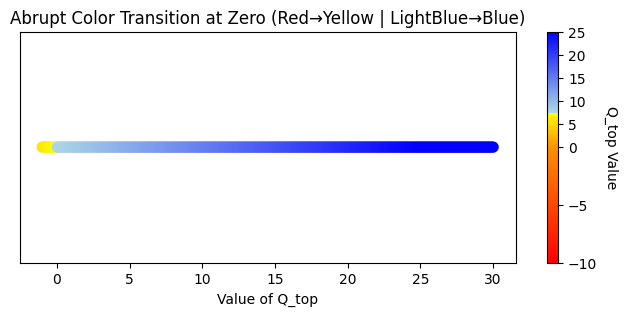

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

class AbruptZeroNorm(Normalize):
    """
    Maps negative values from [vmin, 0] -> [0, 0.5]
    and positive values from [0, vmax] -> [0.5, 1],
    creating an abrupt color boundary at zero.
    """
    def __init__(self, vmin=None, vmax=None):
        super().__init__(vmin, vmax)

    def __call__(self, value, clip=None):
        # Ensure vmin, vmax are set if not provided
        self.autoscale_None(value)
        # Clip values outside [vmin, vmax]
        clipped_value = np.clip(value, self.vmin, self.vmax)
        result = np.empty_like(clipped_value, dtype=float)

        # Negative portion: map [vmin, 0] -> [0, 0.5]
        neg_mask = clipped_value < 0
        result[neg_mask] = 0.5 * (clipped_value[neg_mask] - self.vmin) / (0 - self.vmin)

        # Positive portion: map [0, vmax] -> [0.5, 1]
        pos_mask = clipped_value >= 0
        result[pos_mask] = 0.5 + 0.5 * (clipped_value[pos_mask] - 0) / (self.vmax - 0)

        return result

# Define the abrupt colormap:
#   - red to yellow for negative
#   - lightblue to darkblue for positive
# We assign two very close positions (0.4999999 and 0.5000001) to force
# an immediate transition at the midpoint (which our norm maps to 0.5).
cmap_list = [
    (0.0, 'red'),
    (0.4999999, 'yellow'),
    (0.5000001, 'lightblue'),
    (1.0, 'blue')
]
cmap_tracked_Q_top = LinearSegmentedColormap.from_list("Q_top_scale", cmap_list)

# Create the custom normalization with abrupt boundary at zero
norm_tracked_Q_top = AbruptZeroNorm(vmin=-10, vmax=25)

# Example usage with synthetic data to demonstrate the abrupt shift
x = np.linspace(-1, 30, 300)
y = np.zeros_like(x)
Z = x  # Values go from -30 to +30 horizontally

plt.figure(figsize=(8, 3))
sc = plt.scatter(x, y, c=Z, cmap=cmap_tracked_Q_top, norm=norm_tracked_Q_top, s=50)
cbar = plt.colorbar(sc)
cbar.set_label("Q_top Value", rotation=270, labelpad=15)
plt.title("Abrupt Color Transition at Zero (Red→Yellow | LightBlue→Blue)")
plt.xlabel("Value of Q_top")
plt.yticks([])  # Just hiding the y-axis for clarity
plt.show()


In [45]:
a = np.linspace(-5, 0, num=2)
tick_step_cbar = 5

a_min = min(a)
a_max = max(a)

# Both positive or negative
if (a_min >= 0 and a_max >= 0) or (a_min <= 0 and a_max <= 0):
    ticks = np.arange(a_min, a_max, tick_step_cbar)

# Different sign
elif a_min <= 0 and a_max >= 0:
    ticks = np.hstack((np.arange(a_min, 0, tick_step_cbar),
                       np.arange(0, a_max, tick_step_cbar)))
else:
    print("something wrong in the vector for the colorbar")

print(ticks)


[-5.]
